# Rede neural recorrente 
## para prever preços das ações da petrobrás, com dados do período da greve

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd 

In [6]:
# Carregando a base de dados da ação
base = pd.read_csv("petr4_treinamento_ex.csv")
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [8]:
base.shape

(1345, 7)

In [11]:
# Removenvo dados faltantes
base = base.dropna()

In [12]:
base.shape

(1342, 7)

In [15]:
# Pegando a coluna OPEN da base de dados para fazer esse estudo de caso para criar o modelo de previsão de
# preços

base_train = base.iloc[:, 1:2].values

In [17]:
# Nomalizando os valores dos dados
normalizador = MinMaxScaler(feature_range=(0, 1))

#Normalizando a base de treinamento
base_train_normalizada = normalizador.fit_transform(base_train)

## Modelando os dados para que seja possível o uso de uma rede neural recorrente 

In [18]:
previsores = []
preco_real = []
for i in range(90, 1342):
    previsores.append(base_train_normalizada[i-90:i, 0])
    preco_real.append(base_train_normalizada[i, 0])

In [24]:
print(type(previsores))
print(type(preco_real))

<class 'list'>
<class 'list'>


### Transformando as linhas previsores e preco_real em arrays numpy

In [26]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

print(type(previsores))
print(type(preco_real))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Transformando a matriz para uma matriz válida para ser usada em algorítimos de rede neurais recorrentes

In [30]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

# Estrutura da rede neural recorrente 

In [35]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = "linear"))

In [36]:
# compilando o modelo 

regressor.compile(optimizer="rmsprop",
                  loss = "mean_squared_error",
                  metrics=["mean_absolute_error"])

# Treimando o modelo
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
40/40 [==============================] - 48s 675ms/step - loss: 0.0506 - mean_absolute_error: 0.1650
Epoch 2/100
40/40 [==============================] - 24s 608ms/step - loss: 0.0148 - mean_absolute_error: 0.0931
Epoch 3/100
40/40 [==============================] - 16s 400ms/step - loss: 0.0142 - mean_absolute_error: 0.0894
Epoch 4/100
40/40 [==============================] - 20s 496ms/step - loss: 0.0110 - mean_absolute_error: 0.0777
Epoch 5/100
40/40 [==============================] - 13s 315ms/step - loss: 0.0093 - mean_absolute_error: 0.0723
Epoch 6/100
40/40 [==============================] - 10s 252ms/step - loss: 0.0070 - mean_absolute_error: 0.0616
Epoch 7/100
40/40 [==============================] - 10s 253ms/step - loss: 0.0085 - mean_absolute_error: 0.0699
Epoch 8/100
40/40 [==============================] - 10s 254ms/step - loss: 0.0078 - mean_absolute_error: 0.0657
Epoch 9/100
40/40 [==============================] - 10s 254ms/step - loss: 0.0069 - mean_absolu

Epoch 73/100
40/40 [==============================] - 10s 256ms/step - loss: 0.0018 - mean_absolute_error: 0.0303
Epoch 74/100
40/40 [==============================] - 10s 251ms/step - loss: 0.0019 - mean_absolute_error: 0.0319
Epoch 75/100
40/40 [==============================] - 10s 253ms/step - loss: 0.0016 - mean_absolute_error: 0.0313
Epoch 76/100
40/40 [==============================] - 10s 252ms/step - loss: 0.0015 - mean_absolute_error: 0.0287
Epoch 77/100
40/40 [==============================] - 10s 252ms/step - loss: 0.0016 - mean_absolute_error: 0.0299
Epoch 78/100
40/40 [==============================] - 10s 253ms/step - loss: 0.0016 - mean_absolute_error: 0.0298
Epoch 79/100
40/40 [==============================] - 10s 253ms/step - loss: 0.0015 - mean_absolute_error: 0.0292
Epoch 80/100
40/40 [==============================] - 10s 255ms/step - loss: 0.0017 - mean_absolute_error: 0.0308
Epoch 81/100
40/40 [==============================] - 10s 254ms/step - loss: 0.0017 - me

## Testando o modelo treinado

In [57]:
base_test = pd.read_csv("petr4_teste_ex.csv")

In [58]:
#Estraindo a coluna OPEN para realizar o teste do modelo
preco_real_test = base_test.iloc[:, 1:2].values
preco_real_test.shape

(19, 1)

In [59]:
type(preco_real_test)

numpy.ndarray

### Concatenando o atributo previsor OPEN da base de dados treino com a base de dados test

In [60]:
base_completa = pd.concat((base["Open"], base_test["Open"]), axis = 0)
base_completa.shape

(1361,)

In [61]:
entradas = base_completa[len(base_completa) - len(base_test) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas.shape

(109, 1)

In [62]:
# Colocando os dados na mesma escala da base que foi usada para o treinamento da rede neural recorrente
entradas = normalizador.transform(entradas)

In [65]:
# Criando as entradas para a LSTM
x_test = []
for i in range(90, 109):
    x_test.append(entradas[i-90:i, 0])
x_test = np.array(x_test)
print(x_test)

[[0.56803456 0.59265659 0.6112311  ... 0.86522678 0.68466518 0.71058315]
 [0.59265659 0.6112311  0.6095032  ... 0.68466518 0.71058315 0.64794821]
 [0.6112311  0.6095032  0.60734341 ... 0.71058315 0.64794821 0.59611231]
 ...
 [0.68120946 0.66306691 0.64060479 ... 0.46781857 0.45658747 0.43455724]
 [0.66306691 0.64060479 0.63974082 ... 0.45658747 0.43455724 0.50280778]
 [0.64060479 0.63974082 0.66090713 ... 0.43455724 0.50280778 0.51360691]]


In [66]:
# Comvertendo as entradas para um modelo que a LSTM aceite como entrada
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(19, 90, 1)

## Fazendo as previsõesutilizando o modelo treinado anteriormente

In [67]:
previsoes = regressor.predict(x_test)
print(previsoes)

[[0.65211844]
 [0.6294184 ]
 [0.5918045 ]
 [0.5909211 ]
 [0.6294176 ]
 [0.583924  ]
 [0.5623874 ]
 [0.5419928 ]
 [0.52391297]
 [0.5128212 ]
 [0.50195235]
 [0.4966874 ]
 [0.49370098]
 [0.49010527]
 [0.4814617 ]
 [0.47181812]
 [0.45737165]
 [0.48782897]
 [0.51076984]]


In [68]:
# desnormalizar as previsões
previsoes = normalizador.inverse_transform(previsoes)
print(previsoes)

[[19.296543 ]
 [18.771036 ]
 [17.900274 ]
 [17.879824 ]
 [18.771017 ]
 [17.71784  ]
 [17.219269 ]
 [16.747133 ]
 [16.328587 ]
 [16.071812 ]
 [15.820197 ]
 [15.698315 ]
 [15.629178 ]
 [15.545938 ]
 [15.3458395]
 [15.122589 ]
 [14.788155 ]
 [15.493241 ]
 [16.024323 ]]


In [70]:
print(preco_real_test)

[[19.200001]
 [18.      ]
 [18.389999]
 [19.559999]
 [17.290001]
 [17.360001]
 [16.469999]
 [16.      ]
 [15.81    ]
 [15.5     ]
 [15.48    ]
 [15.42    ]
 [15.33    ]
 [15.03    ]
 [14.77    ]
 [14.26    ]
 [15.84    ]
 [16.09    ]
 [15.41    ]]


In [71]:
previsoes.mean()

16.640587

In [72]:
preco_real_test.mean()

16.379473684210524

In [75]:
previsoes.mean() - preco_real_test.mean()

0.26111316881682

# Gerando Gráficos para comparar as previsões com os preços reais

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline 

<function matplotlib.pyplot.show(close=None, block=None)>

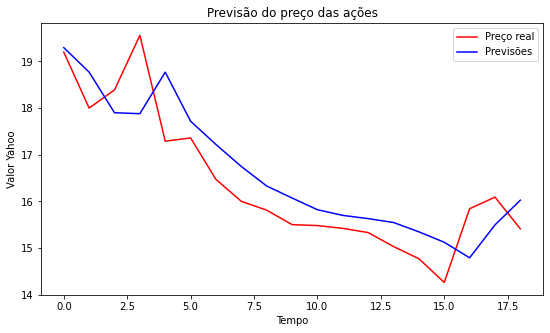

In [94]:
plt.figure(figsize =(9, 5))
plt.plot(preco_real_test, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")
plt.xlabel("Tempo")
plt.ylabel("Valor Yahoo")
plt.legend()
plt.show